In [1]:
import numpy as np
import run_continuum as run
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.signal
import scipy as scp
import scipy.io as sio
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Friction classes for alternative friction laws:
class SlipWeakeningFrictionLaw: 
    
    def __init__(self,dc,delta_u):
        self.dc = dc
        self.delta_u = delta_u
        
    def getFriction(self,x,u,v,tau,stuck):
        frictionForce = np.sign(v)*(1-self.delta_u/self.dc)
        frictionForce[frictionForce<0]=0
        return frictionForce
    
    def step(self,x,u,v,tau,stuck,dt):
        self.delta_u = self.delta_u + v*dt
        self.delta_u[stuck==1]=0 #Arrest sets delta_u to zero
        return

In [3]:
#Gauss distribution for setting up initial stress
def gauss(x, mu, sigma):
    return np.exp(-(x - mu)**2/(2*sigma**2))

In [4]:
# Create a small dataset with different barrier sizes
generate_data = False

if generate_data:
    dt = 1e-3
    tmax = 200
    gamma = 0.65
    beta = 1e-3
    output_interval = 100
    N_runs = 2
    dataBarrier = []

    # Pulses:
    for runInd in range(N_runs):
        x = np.linspace(0,100,10000)
        tau = gauss(x,0,1)*.5 +.5

        tau[0]=1

        tau[3000:3700]=-.2*runInd

        tau[6000:]=-.9

        # run
        dataBarrier.append(run.run_continuum(x = x, tau = tau, tau_minus = tau+2, dt = dt, output_interval = output_interval, gamma = gamma, tmax = tmax, beta = beta))

    # Cracks
    for runInd in range(N_runs):
        x = np.linspace(0,100,10000)
        tau = gauss(x,0,1)*.9 +.1
        tau[0]=1
        tau[3000:3700]=-.2*(runInd+2)
        tau[6000:]=-.9

        # run
        dataBarrier.append(run.run_continuum(x = x, tau = tau, tau_minus = tau+2, dt = dt, output_interval = output_interval, gamma = 0, tmax = tmax, beta = beta))
        
    pickle.dump({'dataBarrier': dataBarrier},  open( "data/data_figure_barrier_example.p", "wb" ))
else:
    data = pickle.load( open( "data/data_figure_barrier_example.p", "rb" ) )
    dataBarrier = data['dataBarrier']
        


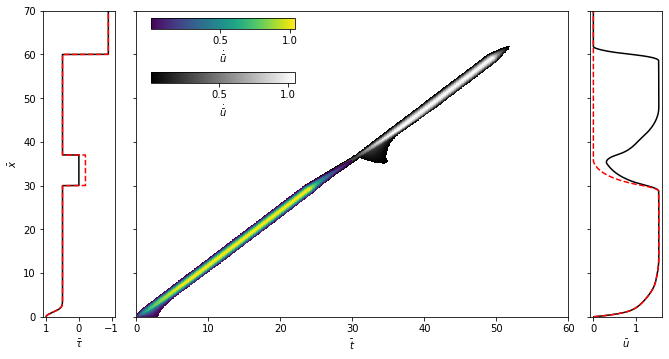

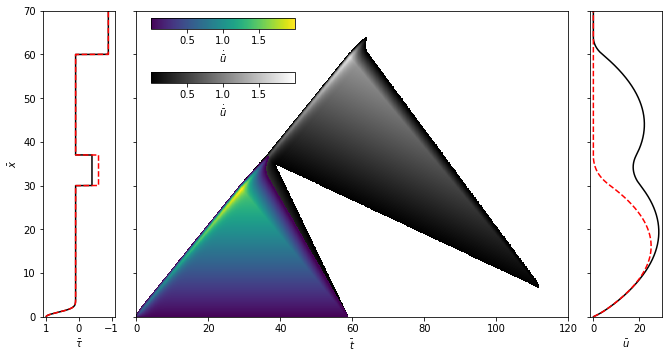

In [5]:
fig = plt.figure(figsize=(10,5))
main_panel = fig.add_axes([.23, .1, .6, .85])
var = dataBarrier[0]['v']
var[var<=1e-3]=float('NaN')
p1 = main_panel.pcolormesh(dataBarrier[0]['t'],dataBarrier[0]['x'],var, zorder = -2, cmap='binary_r')
var = dataBarrier[1]['v']
var[var<=1e-3]=float('NaN')
p2 = main_panel.pcolormesh(dataBarrier[1]['t'],dataBarrier[1]['x'],var, zorder = -1, cmap='viridis')

cax1 = fig.add_axes([.25, .75, .2, .03])
cax2 = fig.add_axes([.25, .9, .2, .03])
cb1 = plt.colorbar(p1, cax = cax1, orientation = 'horizontal', label = '$\\dot \\bar u$')
cb2 = plt.colorbar(p2, cax = cax2, orientation = 'horizontal', label = '$\\dot \\bar u$')

inset = fig.add_axes([.1,.1,.1,.85])
inset.plot(dataBarrier[0]['tau'],dataBarrier[0]['x'],'-k')
inset.plot(dataBarrier[1]['tau'],dataBarrier[1]['x'],'--r')

inset2 = fig.add_axes([.86, .1, .1, .85])
inset2.plot(dataBarrier[0]['u'][:,-1],dataBarrier[2]['x'],'-k')
inset2.plot(dataBarrier[1]['u'][:,-1],dataBarrier[3]['x'],'--r')

inset.set_xlabel('$\\bar \\tau$')
inset.set_ylabel('$\\bar x$')
inset.set_ylim([0,70])
inset.set_xlim([1.1,-1.1])

inset2.set_xlabel('$\\bar u$')
inset2.set_ylim([0,70])
#inset2.set_xlim([0,-1.1])
inset2.set_yticklabels([])

main_panel.set_ylim([0,70])
main_panel.set_yticklabels([])
main_panel.set_xlabel('$\\bar t$')
main_panel.set_xlim([0,60])

main_panel.set_rasterization_zorder(1)
plt.savefig('stress_barrier_pulse_spatiotemporal.eps', format='eps',dpi = 300, rasterized = True)

plt.show()

fig = plt.figure(figsize=(10,5))
main_panel = fig.add_axes([.23, .1, .6, .85])
var = dataBarrier[2]['v']
var[var<=0]=float('NaN')
p1 = main_panel.pcolormesh(dataBarrier[2]['t'],dataBarrier[2]['x'],var, zorder = -2, cmap='binary_r')
var = dataBarrier[3]['v']
var[var<=0]=float('NaN')
p2 = main_panel.pcolormesh(dataBarrier[3]['t'],dataBarrier[3]['x'],var, zorder = -1, cmap='viridis')

cax1 = fig.add_axes([.25, .75, .2, .03])
cax2 = fig.add_axes([.25, .9, .2, .03])
cb1 = plt.colorbar(p1, cax = cax1, orientation = 'horizontal', label = '$\\dot \\bar u$')
cb2 = plt.colorbar(p2, cax = cax2, orientation = 'horizontal', label = '$\\dot \\bar u$')

inset = fig.add_axes([.1,.1,.1,.85])
inset.plot(dataBarrier[2]['tau'],dataBarrier[2]['x'],'-k')
inset.plot(dataBarrier[3]['tau'],dataBarrier[3]['x'],'--r')

inset2 = fig.add_axes([.86, .1, .1, .85])
inset2.plot(dataBarrier[2]['u'][:,-1],dataBarrier[2]['x'],'-k')
inset2.plot(dataBarrier[3]['u'][:,-1],dataBarrier[3]['x'],'--r')

inset.set_xlabel('$\\bar \\tau$')
inset.set_ylabel('$\\bar x$')
inset.set_ylim([0,70])
inset.set_xlim([1.1,-1.1])

inset2.set_xlabel('$\\bar u$')
inset2.set_ylim([0,70])
inset2.set_yticklabels([])

main_panel.set_ylim([0,70])
main_panel.set_xlim([0,120])
main_panel.set_yticklabels([])
main_panel.set_xlabel('$\\bar t$')

main_panel.set_rasterization_zorder(1)
plt.savefig('stress_barrier_crack_spatiotemporal.eps', format='eps',dpi = 300, rasterized = True)
plt.show()